Hello, my name is John-Paul and I am an aspiring data analyst. This is a current project of mine to analyze the Netflix dataset that contains information about its movies and shows. This dataset was provided by Shivam Bansal on kaggle and was last updated three years ago.

In [1]:
!pip install plotly


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
netflix_data = pd.read_csv("netflix_titles.csv")

In [4]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


From the inital observation, I can see that there are some missing values in the title and director columns. In the duration column, the length of the movies are recorded in minutes and number of seasons which is a problem - a column is meant to store only one variable. The listed_in column seems to be like a column that stores genres of the movies or keywords associated with the movie. Some movies seem to be missing cast, director, and country data.

In [5]:
netflix_data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6596,s6597,Movie,Detention Letter,Mohamed Samy,"Mohamed Ramadan, Dina El-Sherbiny, Eyad Nassar...",Egypt,"August 5, 2019",2017,TV-14,99 min,"Action & Adventure, International Movies",A man begins to regret his choices when his br...
3243,s3244,TV Show,Nobody's Looking,NaN,"Victor Lamoglia, Júlia Rabello, Kéfera Buchman...",Brazil,"November 22, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas","A new guardian ""angelus"" uncovers a secret beh..."
1247,s1248,Movie,Banyuki,Hidenori Inoue,"Takaya Kamikawa, Izumi Inamori, Taichi Saotome...",NaN,"March 1, 2021",2009,TV-PG,182 min,"Action & Adventure, Dramas, International Movies",In this stage performance filmed for the big s...
1815,s1816,Movie,The Magic School Bus Rides Again The Frizz Con...,Richard Weston,"Kate McKinnon, Roman Lutterotti, Mikaela Blake...",Canada,"October 20, 2020",2020,TV-Y,46 min,Children & Family Movies,Lightning splits the Magic School Bus into thr...
3567,s3568,Movie,American Factory,"Steven Bognar, Julia Reichert",NaN,United States,"August 21, 2019",2019,TV-14,110 min,Documentaries,"In this documentary, hopes soar when a Chinese..."


In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are null values in the **director, cast, country, date_added, rating,** and **duration** columns

Date_added is an object instead of a datetime variable.

In [7]:
netflix_data.isnull().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
netflix_data['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [10]:
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

There seem to be some funny ratings in the rating column. 84 min and 66 min etc.

I will try splitting and separating the cast column to have only one value per row instead of the multiple that are present in some rows currently

In [11]:
# I will create a separate variable to store the dataframe so that I do not mess with my original dataframe.
test_data= netflix_data
test_data.cast= netflix_data['cast']\
                .apply(lambda x: x.split(', ') if isinstance(x, str) else x)

In [12]:
test_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
test_data = test_data.explode('cast').reset_index(drop=True)

In [14]:
test_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
64946,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
64947,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
64948,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
64949,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


I will try repeating the same process on the 'listed_in' and 'country' columns

In [15]:
test_data.listed_in = test_data['listed_in'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

In [16]:
test_data = test_data.explode('listed_in').reset_index(drop=True)

In [17]:
test_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
149507,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
149508,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
149509,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
149510,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [18]:
test_data.loc[test_data.country.notna() & test_data.country.str.contains(','), 'country']

169       United States, Ghana, Burkina Faso, United Kin...
170       United States, Ghana, Burkina Faso, United Kin...
171       United States, Ghana, Burkina Faso, United Kin...
172       United States, Ghana, Burkina Faso, United Kin...
173       United States, Ghana, Burkina Faso, United Kin...
                                ...                        
149418                         United Arab Emirates, Jordan
149419                         United Arab Emirates, Jordan
149420                         United Arab Emirates, Jordan
149421                         United Arab Emirates, Jordan
149422                         United Arab Emirates, Jordan
Name: country, Length: 24355, dtype: object

In [19]:
test_data['country'] = test_data['country'].apply(lambda x: x.split(',') if isinstance(x,str) else x)
test_data = test_data.explode('country').reset_index(drop=True)
test_data['country'] = test_data['country'].str.strip()

Exploding all the values into their own rows has created a lot of redundancies in this table. I will go ahead to normalize the table in a similar fashion to how it is done when building relational databases.

In [20]:
test_data['cast_id'] = test_data['cast'].astype('category').cat.codes
test_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_id
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",-1
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",1604
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",1604
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",1604
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",18114


In [21]:
test_data['country_id'] = test_data['country'].astype('category').cat.codes
country = test_data[['country_id', 'country']]\
            .drop_duplicates()\
            .reset_index(drop=True)\
            .set_index('country_id')['country']
country

country_id
 116    United States
 100     South Africa
-1                NaN
 46             India
 40             Ghana
            ...      
 105            Sudan
 82            Panama
 112           Uganda
 32      East Germany
 70        Montenegro
Name: country, Length: 124, dtype: object

In [22]:
cast = test_data[['cast_id', 'cast']]\
        .drop_duplicates()\
        .reset_index(drop=True)\
        .set_index('cast_id')['cast']
cast

cast_id
-1                          NaN
 1604                Ama Qamata
 18114              Khosi Ngema
 11095            Gail Mabalane
 33079           Thabang Molaba
                  ...          
 29084              Ryan Newman
 27125          Raaghav Chanana
 20969            Malkeet Rauni
 2426            Anita Shabdish
 6205     Chittaranjan Tripathy
Name: cast, Length: 36440, dtype: object

In [23]:
test_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_id,country_id
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",-1,116
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",1604,100
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",1604,100
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",1604,100
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",18114,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186394,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2426,46
186395,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2426,46
186396,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,6205,46
186397,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,6205,46


In [24]:
test_data['genre_id'] = test_data['listed_in'].astype('category').cat.codes
genre = test_data[['genre_id', 'listed_in']]\
        .drop_duplicates()\
        .reset_index(drop=True)\
        .set_index('genre_id')['listed_in']
genre

genre_id
10                   Documentaries
17          International TV Shows
34                       TV Dramas
36                    TV Mysteries
8                   Crime TV Shows
32           TV Action & Adventure
11                      Docuseries
23                      Reality TV
25               Romantic TV Shows
33                     TV Comedies
35                       TV Horror
4         Children & Family Movies
12                          Dramas
15              Independent Movies
16            International Movies
3                 British TV Shows
7                         Comedies
28       Spanish-Language TV Shows
41                       Thrillers
24                 Romantic Movies
22                Music & Musicals
14                   Horror Movies
26                Sci-Fi & Fantasy
39                    TV Thrillers
18                        Kids' TV
0               Action & Adventure
37             TV Sci-Fi & Fantasy
6                   Classic Movies
1          

In [25]:
shows = test_data[['show_id', 'type', 'title', 'director', 'date_added', 'release_year', 'rating', 'duration','description']]\
        .drop_duplicates()\
        .reset_index(drop=True)\
        .set_index('show_id')
shows

,type,title,director,date_added,release_year,rating,duration,description
show_id,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"November 20, 2019",2007,R,158 min,"A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...


In [26]:
shows_cast = test_data[['show_id','cast_id']].drop_duplicates().reset_index(drop=True)
shows_country = test_data[['show_id', 'country_id']].drop_duplicates().reset_index(drop=True)
shows_genre = test_data[['show_id', 'genre_id']].drop_duplicates().reset_index(drop=True)

The new datasets (or in database lingo, entities) are: 
- shows
- country
- genre
- cast
- shows_country
- shows_cast
- shows_genre

In [27]:
# I will convert the type and rating columns to categorical variables so as to save on space and improve efficiency
shows = shows.astype({'type':'category', 'rating':'category'})
shows.dtypes

type            category
title             object
director          object
date_added        object
release_year       int64
rating          category
duration          object
description       object
dtype: object

In [28]:
shows.head()

,type,title,director,date_added,release_year,rating,duration,description
show_id,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...


In [29]:
shows = shows.rename(columns={'listed_in':'genre'})
genre.name = 'genre'

In [30]:
shows['date_added'] = shows['date_added'].str.strip()
shows['date_added'] = pd.to_datetime(shows['date_added'], format='%B %d, %Y')

In [31]:
shows

,type,title,director,date_added,release_year,rating,duration,description
show_id,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,2019-11-20,2007,R,158 min,"A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,2019-11-01,2009,R,88 min,Looking to survive in a world taken over by zo...


In [32]:
# I want to split the duration column into two columns. One column will store the duration in minutes, and the other will store the duration 
# in seasons
shows['number'] = shows['duration'].str.extract(r'(\d+)').astype('Int64')

shows['duration'] = shows['duration'].astype(str)
shows['duration_in_minutes'] = shows.apply(lambda row: row['number'] if 'min' in row['duration'] else None, axis=1)\
                                .astype('Int64') 
                                
shows['duration_in_seasons'] = shows.apply(lambda row: row['number'] if 'Season' in row['duration'] else None, axis=1)\
                                .astype('Int64')


In [33]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 8807 non-null   category      
 1   title                8807 non-null   object        
 2   director             6173 non-null   object        
 3   date_added           8797 non-null   datetime64[ns]
 4   release_year         8807 non-null   int64         
 5   rating               8803 non-null   category      
 6   duration             8807 non-null   object        
 7   description          8807 non-null   object        
 8   number               8804 non-null   Int64         
 9   duration_in_minutes  6128 non-null   Int64         
 10  duration_in_seasons  2676 non-null   Int64         
dtypes: Int64(3), category(2), datetime64[ns](1), int64(1), object(4)
memory usage: 731.8+ KB


In [34]:
shows = shows.drop(['duration','number'], axis=1)
shows

,type,title,director,date_added,release_year,rating,description,duration_in_minutes,duration_in_seasons
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90,<NA>
s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",<NA>,2
s3,TV Show,Ganglands,Julien Leclercq,2021-09-24,2021,TV-MA,To protect his family from a powerful drug lor...,<NA>,1
s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",<NA>,1
s5,TV Show,Kota Factory,NaN,2021-09-24,2021,TV-MA,In a city of coaching centers known to train I...,<NA>,2
...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,2019-11-20,2007,R,"A political cartoonist, a crime reporter and a...",158,<NA>
s8804,TV Show,Zombie Dumb,NaN,2019-07-01,2018,TV-Y7,"While living alone in a spooky town, a young g...",<NA>,2
s8805,Movie,Zombieland,Ruben Fleischer,2019-11-01,2009,R,Looking to survive in a world taken over by zo...,88,<NA>


In [35]:
x = shows.iloc[:,0:7]
x.loc[x.isnull().any(axis=1)]

,type,title,director,date_added,release_year,rating,description
show_id,,,,,,,
s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t..."
s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,2021-09-24,2021,TV-MA,In a city of coaching centers known to train I...
s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,2021-09-24,2021,TV-MA,"Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
s15,TV Show,Crime Stories: India Detectives,NaN,2021-09-22,2021,TV-MA,Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...
s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,2018-05-01,2015,TV-Y7,Now that he's discovered the Pendulum Summonin...
s8797,TV Show,Yunus Emre,NaN,2017-01-17,2016,TV-PG,"During the Mongol invasions, Yunus Emre leaves..."
s8798,TV Show,Zak Storm,NaN,2018-09-13,2016,TV-Y7,Teen surfer Zak Storm is mysteriously transpor...


In [36]:
x.isnull().sum(axis=0)

type               0
title              0
director        2634
date_added        10
release_year       0
rating             4
description        0
dtype: int64

In [37]:
x.loc[x['director'].isna()]

,type,title,director,date_added,release_year,rating,description
show_id,,,,,,,
s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t..."
s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,2021-09-24,2021,TV-MA,In a city of coaching centers known to train I...
s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,2021-09-24,2021,TV-MA,"Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
s15,TV Show,Crime Stories: India Detectives,NaN,2021-09-22,2021,TV-MA,Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...
s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,2018-05-01,2015,TV-Y7,Now that he's discovered the Pendulum Summonin...
s8797,TV Show,Yunus Emre,NaN,2017-01-17,2016,TV-PG,"During the Mongol invasions, Yunus Emre leaves..."
s8798,TV Show,Zak Storm,NaN,2018-09-13,2016,TV-Y7,Teen surfer Zak Storm is mysteriously transpor...


There are a lot of null values in the director column. It also feels like they are all TV Shows

In [38]:
shows.loc[shows['director'].notna() & (shows['type']=='TV Show')]

,type,title,director,date_added,release_year,rating,description,duration_in_minutes,duration_in_seasons
show_id,,,,,,,,,
s3,TV Show,Ganglands,Julien Leclercq,2021-09-24,2021,TV-MA,To protect his family from a powerful drug lor...,<NA>,1
s6,TV Show,Midnight Mass,Mike Flanagan,2021-09-24,2021,TV-MA,The arrival of a charismatic young priest brin...,<NA>,1
s9,TV Show,The Great British Baking Show,Andy Devonshire,2021-09-24,2021,TV-14,A talented batch of amateur bakers face off in...,<NA>,9
s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,2021-09-23,2021,TV-MA,"Struggling to earn a living in Bangkok, a man ...",<NA>,1
s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,2021-09-22,2021,TV-14,"In the late 1970s, an accused serial rapist cl...",<NA>,1
...,...,...,...,...,...,...,...,...,...
s8236,TV Show,The Calling,Bumpy,2019-04-01,2018,TV-MA,Food-crazed travel junkies journey across Indi...,<NA>,1
s8294,TV Show,The Fear,Michael Samuels,2017-03-31,2012,TV-MA,Richie Beckett is an aging Brighton crime boss...,<NA>,1
s8303,TV Show,The Five,Mark Tonderai,2017-09-15,2016,TV-MA,Twenty years after 5-year-old Jesse disappears...,<NA>,1


In [39]:
shows.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Well, a majority of the TV Shows have empty values in their director column

In [40]:
shows.loc[shows.rating.str.contains('min', na=False)]

,type,title,director,date_added,release_year,rating,description,duration_in_minutes,duration_in_seasons
show_id,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,2017-04-04,2017,74 min,"Louis C.K. muses on religion, eternal love, gi...",<NA>,<NA>
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,2016-09-16,2010,84 min,Emmy-winning comedy writer Louis C.K. brings h...,<NA>,<NA>
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,2016-08-15,2015,66 min,The comic puts his trademark hilarious/thought...,<NA>,<NA>


In [41]:
if shows.rating.str.contains('min', na=False).any():
    condition = shows.rating.str.contains('min', na=False)
    shows.loc[condition, 'duration_in_minutes'] = shows.loc[condition].rating.str.extract(r'(\d+)').astype('Int64')[0]
    shows.loc[condition, 'rating'] = None

In [42]:
shows.loc[condition].rating.str.extract(r'(\d+)').astype('float')[0]

show_id
s5542   NaN
s5795   NaN
s5814   NaN
Name: 0, dtype: float64

In [43]:
shows[shows.title.str.contains('Louis')]

,type,title,director,date_added,release_year,rating,description,duration_in_minutes,duration_in_seasons
show_id,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,2017-04-04,2017,NaN,"Louis C.K. muses on religion, eternal love, gi...",74,<NA>
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,2016-09-16,2010,NaN,Emmy-winning comedy writer Louis C.K. brings h...,84,<NA>
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,2016-08-15,2015,NaN,The comic puts his trademark hilarious/thought...,66,<NA>
s7298,TV Show,License to Drill: Louisiana,NaN,2019-10-02,2014,TV-PG,A crew of oil riggers work an off-season job a...,<NA>,1


In [44]:
shows

,type,title,director,date_added,release_year,rating,description,duration_in_minutes,duration_in_seasons
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90,<NA>
s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",<NA>,2
s3,TV Show,Ganglands,Julien Leclercq,2021-09-24,2021,TV-MA,To protect his family from a powerful drug lor...,<NA>,1
s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",<NA>,1
s5,TV Show,Kota Factory,NaN,2021-09-24,2021,TV-MA,In a city of coaching centers known to train I...,<NA>,2
...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,2019-11-20,2007,R,"A political cartoonist, a crime reporter and a...",158,<NA>
s8804,TV Show,Zombie Dumb,NaN,2019-07-01,2018,TV-Y7,"While living alone in a spooky town, a young g...",<NA>,2
s8805,Movie,Zombieland,Ruben Fleischer,2019-11-01,2009,R,Looking to survive in a world taken over by zo...,88,<NA>


# Analysis 
Now, I will begin my analysis since I have finished cleaning my data. My first question is what are the most common genres on Netflix


In [45]:
# I want to set my color palette and fonts here
custom_palette = ["#f8c2c6", "#f47a80", "#f13a47", "#ee1c2b", "#e50914"]
custom_font = 'Roboto'

sns.set_palette(custom_palette)

plt.rcParams['font.family'] = custom_font
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 18

default_color = '#e50914'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[default_color])

plt.rcParams['font.weight'] = 'regular'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'regular'

## What are the most common genres on Netflix?


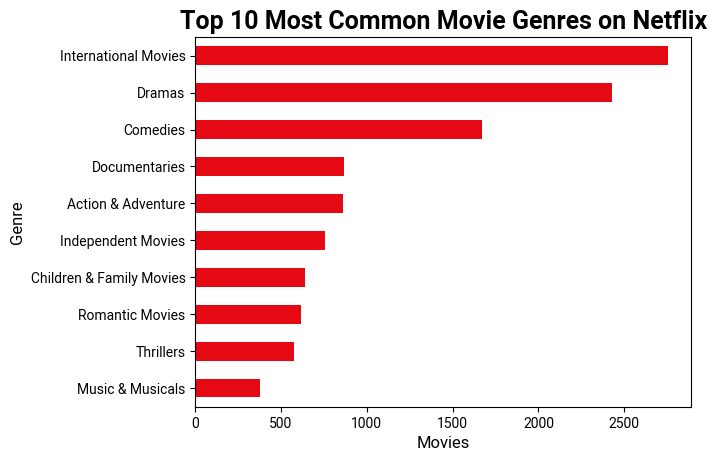

In [46]:
shows.loc[shows.type == 'Movie']\
.merge(shows_genre, how='left', on='show_id')\
.merge(genre, how='left', on='genre_id')\
.groupby('genre')\
.agg({'title':'count'})\
.sort_values('title', ascending=False)\
.head(10)\
.plot.barh(ylabel='Genre', xlabel='Movies', title='Top 10 Most Common Movie Genres on Netflix', legend=False)\
.invert_yaxis()

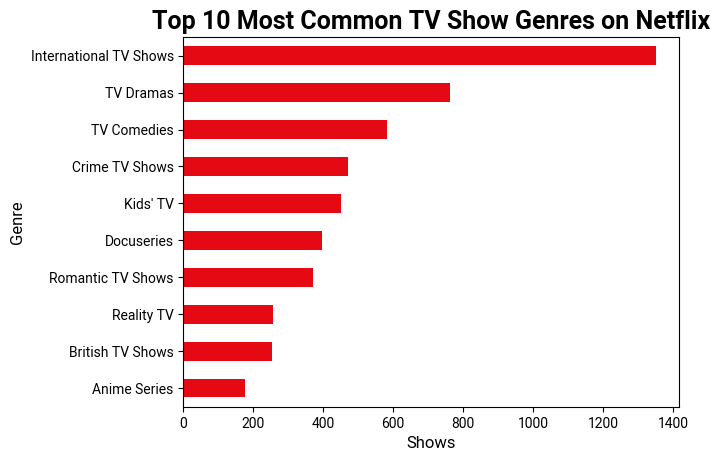

In [47]:
shows.loc[shows.type != 'Movie']\
.merge(shows_genre, how='left', on='show_id')\
.merge(genre, how='left', on='genre_id')\
.groupby('genre')\
.agg({'title':'count'})\
.sort_values('title', ascending=False)\
.head(10)\
.plot.barh(ylabel='Genre', xlabel='Shows', title='Top 10 Most Common TV Show Genres on Netflix', color='#E50914', legend=False)\
.invert_yaxis()

International TV Shows and Movies seems to be an like an umbrella term used to categorize movies made outside of the US. If that is the case, let us see the genres that make up International TV Shows and Movies.

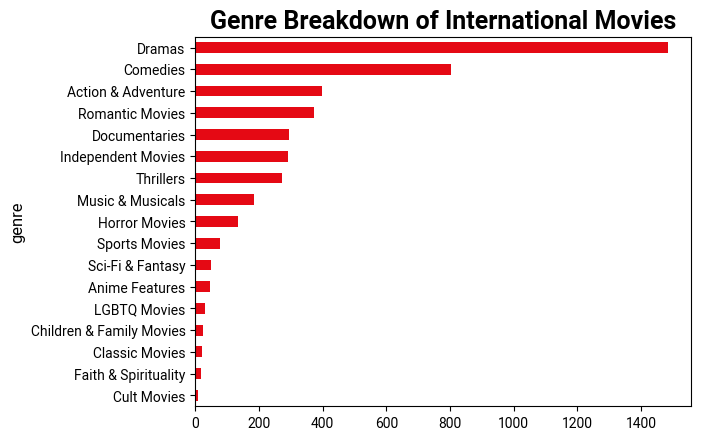

In [48]:
shows.loc[shows.type == 'Movie']\
.merge(shows_genre, how='left', on='show_id')\
.merge(genre, how='left', on='genre_id')\
.query('genre == "International Movies"')\
.drop(columns = [col for col in shows.columns if col != 'show_id'])\
.drop(columns = ['genre_id', 'genre'])\
.merge(shows_genre, how='left', on='show_id')\
.merge(genre, how='left', on='genre_id')\
.query('genre != "International Movies"')\
.groupby('genre')['show_id'].count()\
.sort_values(ascending=False)\
.plot(kind='barh', title='Genre Breakdown of International Movies')\
.invert_yaxis()

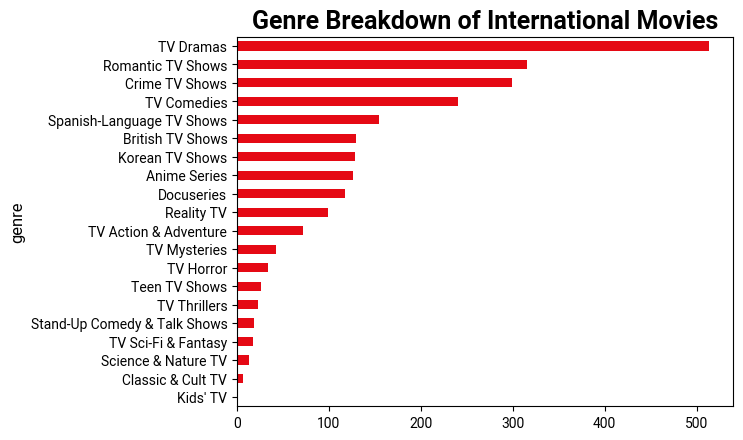

In [49]:
shows.loc[shows.type != 'Movie']\
.merge(shows_genre, how='left', on='show_id')\
.merge(genre, how='left', on='genre_id')\
.query('genre == "International TV Shows"')\
.drop(columns = [col for col in shows.columns if col != 'show_id'])\
.drop(columns = ['genre_id', 'genre'])\
.merge(shows_genre, how='left', on='show_id')\
.merge(genre, how='left', on='genre_id')\
.query('genre != "International TV Shows"')\
.groupby('genre')['show_id'].count()\
.sort_values(ascending=False)\
.plot(kind='barh', title='Genre Breakdown of International Movies')\
.invert_yaxis()

## Which movie genre has the longest average duration?

In [50]:
shows

,type,title,director,date_added,release_year,rating,description,duration_in_minutes,duration_in_seasons
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90,<NA>
s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",<NA>,2
s3,TV Show,Ganglands,Julien Leclercq,2021-09-24,2021,TV-MA,To protect his family from a powerful drug lor...,<NA>,1
s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",<NA>,1
s5,TV Show,Kota Factory,NaN,2021-09-24,2021,TV-MA,In a city of coaching centers known to train I...,<NA>,2
...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,2019-11-20,2007,R,"A political cartoonist, a crime reporter and a...",158,<NA>
s8804,TV Show,Zombie Dumb,NaN,2019-07-01,2018,TV-Y7,"While living alone in a spooky town, a young g...",<NA>,2
s8805,Movie,Zombieland,Ruben Fleischer,2019-11-01,2009,R,Looking to survive in a world taken over by zo...,88,<NA>


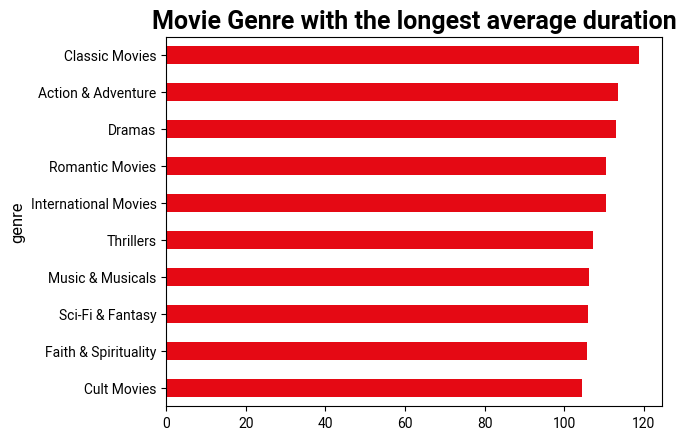

In [51]:
shows[shows.type == 'Movie']\
.merge(shows_genre, on='show_id', how='left')\
.merge(genre, on='genre_id', how='left')\
.groupby('genre').agg({'duration_in_minutes':'mean'})\
.sort_values(by='duration_in_minutes', ascending=False)\
.head(10)\
.plot.barh(legend=False, title='Movie Genre with the longest average duration')\
.invert_yaxis()

In [52]:
shows[shows.type == 'Movie']\
.merge(shows_genre, how='left', on='show_id')\
.merge(genre, how='left', on='genre_id')\
.groupby('genre')\
.agg({'duration_in_minutes':'mean'})\
.sort_values('duration_in_minutes', ascending=False)

,duration_in_minutes
genre,
Classic Movies,118.646552
Action & Adventure,113.515716
Dramas,113.051092
Romantic Movies,110.573052
International Movies,110.349927
Thrillers,107.166378
Music & Musicals,106.125333
Sci-Fi & Fantasy,106.016461
Faith & Spirituality,105.584615


In [53]:
shows[shows.type != 'Movie']\
.merge(shows_genre, how='left', on='show_id')\
.merge(genre, how='left', on='genre_id')\
.groupby('genre')\
.agg({'duration_in_seasons':'mean'})\
.sort_values('duration_in_seasons', ascending=False)

,duration_in_seasons
genre,
Classic & Cult TV,5.678571
TV Sci-Fi & Fantasy,2.654762
TV Action & Adventure,2.39881
Teen TV Shows,2.246377
TV Mysteries,2.193878
TV Comedies,2.151463
TV Horror,2.106667
TV Thrillers,2.052632
Kids' TV,1.977827


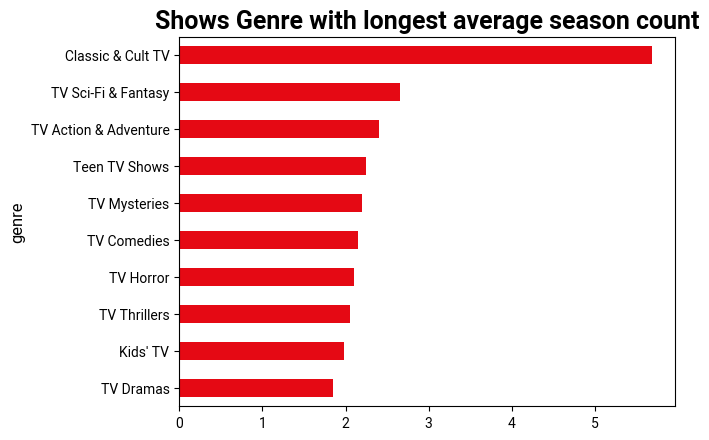

In [54]:
shows[shows.type != 'Movie']\
.merge(shows_genre, on='show_id', how='left')\
.merge(genre, on='genre_id', how='left')\
.groupby('genre').agg({'duration_in_seasons':'mean'})\
.sort_values(by='duration_in_seasons', ascending=False)\
.head(10)\
.plot.barh(legend=False, title='Shows Genre with longest average season count')\
.invert_yaxis()

In [55]:
shows.plot?

Signature:      shows.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x00000246808ECD70>
File:           c:\users\dell xps 13\appdata\local\programs\python\python312\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : 

### Who are the most frequently appearing actors in Netflix movies

In [56]:
netflix_data.cast[netflix_data['type'] == 'Movie'].isna().any(axis=0)

True

In [57]:
netflix_data.cast[netflix_data['type'] == 'Movie'].isna().value_counts()

cast
False    5656
True      475
Name: count, dtype: int64

In [58]:
shows[shows.type == 'Movie']\
.merge(shows_cast, how='left', on='show_id')\
.merge(cast, how='left', on='cast_id')\
.groupby('cast')\
.agg({'title':'count'})\
.sort_values('title', ascending=False)\
.head(5)

,title
cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,32
Akshay Kumar,30
Om Puri,30


In [59]:
shows[shows.type != 'Movie']\
.merge(shows_cast, how='left', on='show_id')\
.merge(cast, how='left', on='cast_id')\
.groupby('cast')\
.agg({'title':'count'})\
.sort_values('title', ascending=False)\
.head(5)

,title
cast,
Takahiro Sakurai,25
Yuki Kaji,19
Junichi Suwabe,17
Daisuke Ono,17
Ai Kayano,17


In [60]:
shows.director[shows['type'] =='Movie'].str.contains(',').value_counts()

director
False    5371
True      572
Name: count, dtype: int64

In [61]:
x = shows[shows['type'] =='Movie']
x[shows.director[shows['type'] =='Movie'].fillna('False').str.contains(',')]
del x

In [62]:
test_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_id,country_id,genre_id
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",-1,116,10
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",1604,100,17
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",1604,100,34
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",1604,100,36
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",18114,100,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186394,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2426,46,16
186395,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2426,46,22
186396,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,6205,46,12
186397,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,6205,46,16


### Which countries produce the most movies on Netflix

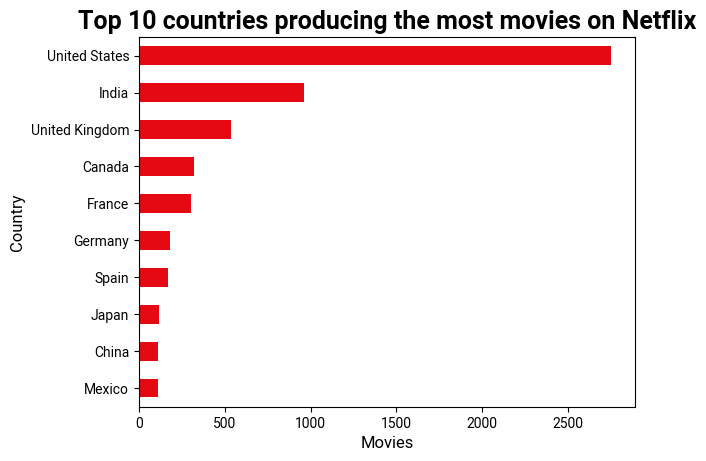

In [63]:
shows[shows.type =='Movie']\
.merge(shows_country, on ='show_id', how='left')\
.merge(country, on='country_id', how='left')\
.groupby('country')\
.agg({'title':'count'})\
.sort_values('title', ascending=False)\
.head(10)\
.plot.barh(legend=False, title='Top 10 countries producing the most movies on Netflix', xlabel='Movies', ylabel='Country')\
.invert_yaxis()

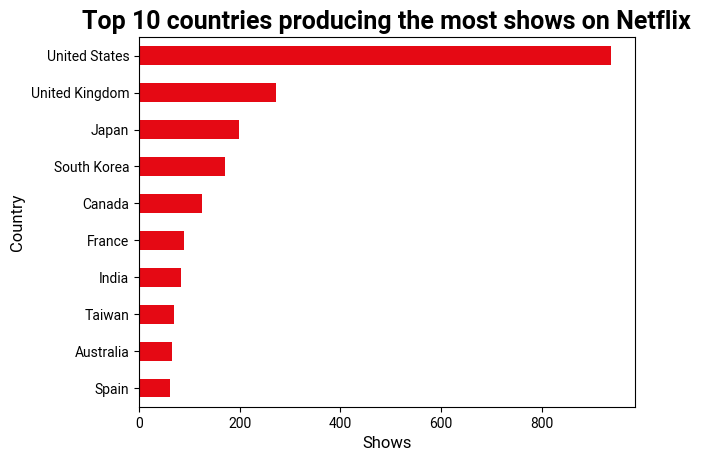

In [64]:
# This is to check with TV Shows
shows[shows.type !='Movie']\
.merge(shows_country, on ='show_id', how='left')\
.merge(country, on='country_id', how='left')\
.groupby('country')\
.agg({'title':'count'})\
.sort_values('title', ascending=False)\
.head(10)\
.plot.barh(legend=False, title='Top 10 countries producing the most shows on Netflix', xlabel='Shows', ylabel='Country')\
.invert_yaxis()

### How does the genre distribution vary by country?

In [65]:
shows.sort_values?

Signature:
shows.sort_values(
    by: 'IndexLabel',
    *,
    axis: 'Axis' = 0,
    ascending: 'bool | list[bool] | tuple[bool, ...]' = True,
    inplace: 'bool' = False,
    kind: 'SortKind' = 'quicksort',
    na_position: 'str' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc | None' = None,
) -> 'DataFrame | None'
Docstring:
Sort by the values along either axis.

Parameters
----------
by : str or list of str
    Name or list of names to sort by.

    - if `axis` is 0 or `'index'` then `by` may contain index
      levels and/or column labels.
    - if `axis` is 1 or `'columns'` then `by` may contain column
      levels and/or index labels.
axis : "{0 or 'index', 1 or 'columns'}", default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     If True, perform operation 

In [66]:
shows[shows.type =='Movie']\
.merge(shows_country, on ='show_id', how='left')\
.merge(country, on='country_id', how='left')\
.merge(shows_genre, on='show_id', how='left')\
.merge(genre, on='genre_id', how='left')\
.groupby(['country','genre'])\
.size()\
.reset_index(name='count')\
.sort_values('count', ascending=False)

,country,genre,count
331,India,International Movies,864
849,United States,Dramas,835
846,United States,Comedies,680
327,India,Dramas,662
848,United States,Documentaries,512
...,...,...,...
472,Malaysia,Independent Movies,1
468,Malaysia,Children & Family Movies,1
466,Malawi,Independent Movies,1
465,Malawi,Dramas,1


In [67]:
genre_geo = shows[shows.type =='Movie']\
.merge(shows_country, on ='show_id', how='left')\
.merge(country, on='country_id', how='left')\
.merge(shows_genre, on='show_id', how='left')\
.merge(genre, on='genre_id', how='left')\
.groupby(['country','genre'])\
.agg(count=('genre', 'count'))\
.reset_index()\
.assign(total_count=lambda x: x.groupby('country')['count'].transform('sum'))\
.sort_values(['total_count', 'count'], ascending=[False,False])

In [68]:
hover_texts = genre_geo.groupby('country').apply(
    lambda x: '<br>'.join([f"{row['genre']}: {row['count']}" for _, row in x.iterrows()])
).reset_index(name='hover_text')

geo_merge = pd.merge(genre_geo, hover_texts, how='left', on='country')
hover_texts

,country,hover_text
0,,International Movies: 5<br>Dramas: 4<br>Docume...
1,Afghanistan,Documentaries: 1<br>International Movies: 1
2,Albania,Dramas: 1<br>International Movies: 1
3,Algeria,Dramas: 3<br>International Movies: 3<br>Classi...
4,Angola,Action & Adventure: 1<br>International Movies: 1
...,...,...
113,Vatican City,Documentaries: 1<br>Faith & Spirituality: 1<br...
114,Venezuela,Documentaries: 3<br>International Movies: 3<br...
115,Vietnam,International Movies: 7<br>Dramas: 4<br>Action...
116,West Germany,International Movies: 2<br>Children & Family M...


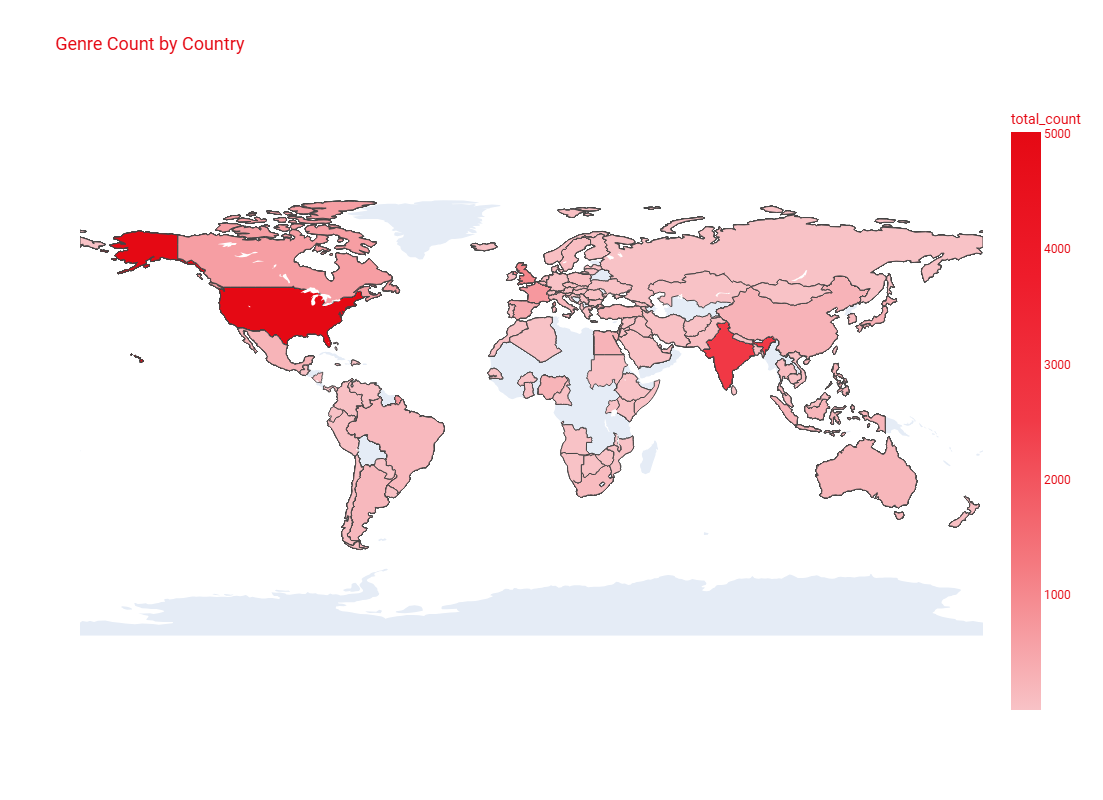

In [78]:
fig = px.choropleth(
    geo_merge, 
    locations='country',       
    locationmode='country names', 
    color='total_count',             
    hover_name='country',      
    color_continuous_scale=custom_palette,  # Color scale
    hover_data={'hover_text': True, 'total_count': True},  # Label for the color bar
    title='Genre Count by Country',
    projection='equirectangular' # Map projection type
)

fig.update_traces(
    hovertemplate="<br>%{hovertext}<br><extra></extra>",
    hovertext='<b>'+geo_merge['country'] +'</b>'+ '<br>' + geo_merge['hover_text']
)

# Update layout for title and other settings
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
    ),
    title_font=dict(
        family=custom_font,
        size=plt.rcParams['axes.titlesize'],
        color=default_color,
    ),
    font=dict(
        family=custom_font,
        size=plt.rcParams['font.size'],
        color=default_color,
    ),
    width=1200,  # Set the figure width
    height=800,  # Set the figure height
)

# Show the plot
fig.show()

### Are there any regional trends in movie types or genres?

In [70]:
country_region={
'Africa':[
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
    'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Democratic Republic of the Congo',
    'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
    'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi',
    'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
    'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo',
    'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
],

'Asia':[
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
    'China', 'Cyprus', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
    'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore',
    'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan', 'Turkey',
    'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
],

'Europe':[
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'East Germany', 'West Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
    'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia',
    'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Soviet Union', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom',
    'Vatican City'
],

'North America':[
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Canada', 'Cayman Islands', 'Costa Rica', 'Cuba', 'Dominica',
    'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago',
    'United States'
],

'South America':[
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
    'Uruguay', 'Venezuela'
],

'Oceania':[
    'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea',
    'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
]
}

In [71]:
region_map = {country:continent for continent, countries in country_region.items() for country in countries}

In [72]:
shows[shows.type == 'Movie']\
.merge(shows_country, on='show_id', how='left')\
.merge(country, on='country_id', how='left')\
.merge(shows_genre, on='show_id', how='left')\
.merge(genre, on='genre_id', how='left')\
.assign(region=lambda x: x['country'].apply(\
        lambda c: 'Africa' if c in africa else\
                  'Europe' if c in europe else\
                  'North America' if c in north_america else\
                  'South America' if c in south_america else\
                  'Asia' if c in asia else\
                  'Oceania' if c in oceania else\
                  'Unknown'\
    ))\
.groupby(['region', 'country', 'genre','release_year'])\
.size()\
.reset_index(name='count')\
.assign(total_count=lambda df: df.groupby('country')['count'].transform('sum'))

NameError: name 'africa' is not defined

In [ ]:
country[0:126]

In [79]:
shows[shows.type == 'Movie']\
.merge(shows_country, on='show_id', how='left')\
.merge(country, on='country_id', how='left')\
.merge(shows_genre, on='show_id', how='left')\
.merge(genre, on='genre_id', how='left')\
.assign(region=lambda x: x['country'].map(region_map).fillna('Unknown'))\
.groupby(['region', 'genre','release_year'])\
.size()\
.reset_index(name='count')\
.assign(total_count=lambda df: df.groupby('region')['count'].transform('sum'))\
.sort_values(['total_count', 'count'], ascending=[False, False])\
.drop(columns='total_count')


,region,genre,release_year,count
1373,North America,Dramas,2017,124
1316,North America,Documentaries,2017,121
1374,North America,Dramas,2018,113
1372,North America,Dramas,2016,108
1375,North America,Dramas,2019,93
...,...,...,...,...
1834,Oceania,Thrillers,2014,1
1835,Oceania,Thrillers,2015,1
1836,Oceania,Thrillers,2016,1
1837,Oceania,Thrillers,2017,1


In [ ]:
shows[shows.type != 'Movie']\
.merge(shows_country, on='show_id', how='left')\
.merge(country, on='country_id', how='left')\
.merge(shows_genre, on='show_id', how='left')\
.merge(genre, on='genre_id', how='left')\
.assign(region=lambda x: x['country'].map(region_map).fillna('Unknown'))\
.groupby(['region', 'genre','release_year'])\
.size()\
.reset_index(name='count')\
.assign(total_count=lambda df: df.groupby('region')['count'].transform('sum'))\
.sort_values(['total_count', 'count'], ascending=[False, False])\
.drop(columns='total_count')


### How has the number of movies added to Netflix changed over time?

In [ ]:
shows[shows.type == 'Movie']\
.groupby('release_year')['title'].count()\
.plot.line(title='Number of movies added to Netflix over the years',figsize=(12,5), xlabel='Release year', ylabel='Movies')

### Are certain genres becoming more or less popular over the years?

In [ ]:
shows[shows.type == 'Movie']\
.merge(shows_genre, on='show_id', how='left')\
.merge(genre, on='genre_id', how='left')\
.groupby(['genre', 'release_year'])\
.agg({'title':'count'})

### What are the trends in movie durations over time?

In [ ]:
shows[shows.type == 'Movie']\
.groupby(['release_year'])\
.agg({'duration_in_minutes':'mean'})\
.plot(figsize=(12,4))

In [ ]:
shows[shows.type == 'Movie']\
.assign(year_added= lambda x: x['date_added'].dt.year)\
.groupby(['year_added'])\
.agg({'duration_in_minutes':'mean'})\
.plot(kind='line', figsize=(12,6),legend=False, title='Increase in the average duration of recently added movies', xlabel='Year added', ylabel='Movie durarion (minutes)')

### What are the most common keywords in movie descriptions, and how do they vary by genre?

In [ ]:
shows[shows.type == 'Movie']\
.groupby(['release_year'])\
.agg({'duration_in_minutes':'mean'})\
.sort_values('duration_in_minutes', ascending=False)

In [ ]:
shows.loc[(shows.release_year>1961) & (shows.release_year<1965)] 

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

def get_top_keywords(df, column_name, top_n=10):
    # Combine all text
    all_text = ' '.join(df[column_name].dropna())
    
    # Preprocess
    tokens = preprocess_text(all_text)
    
    # Count words
    word_counts = Counter(tokens)
    
    # Get top N words
    return word_counts.most_common(top_n)

In [ ]:
top_keywords = get_top_keywords(shows, 'description')
print(top_keywords)

In [ ]:
def genre_select(type,name):
    return(
        shows.query(f'type=="{type}"')\
        .merge(shows_genre, on='show_id', how='left')\
        .merge(genre, on='genre_id', how='left')\
        .drop(columns=['director',	'date_added', 'release_year','rating', 'duration_in_minutes','duration_in_seasons','genre_id'])\
        .query(f'genre=="{name}"')
    )

In [ ]:
for value in genre:
    result = genre_select('Movie',value)
    if result.empty:
        continue
    else:
        top_keywords = get_top_keywords(result, 'description')
        print(f'These are the most common keywords in {value}: {top_keywords} \n')
   # print(f'The genre is: {value}')

In [ ]:
for value in genre:
    result = genre_select('TV Show',value)
    if result.empty:
        continue
    else:
        top_keywords = get_top_keywords(result, 'description')
        print(f'These are the most common keywords in {value}: {top_keywords} \n')

### Are there any patterns in the types of movies that tend to be added together?

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

result = shows[shows.type != 'Movie']\
        .merge(shows_genre, on='show_id', how='left')\
        .merge(genre, on='genre_id', how='left')\
        .assign(release_month= lambda x: pd.Categorical(x['date_added'].dt.strftime('%B'), categories=month_order, ordered=True))\
        .groupby(['genre','release_month'])['release_month'].count()\
        .reset_index(name='count')\
        .pivot(index='release_month', columns='genre', values='count')

#result_pivot = result.pivot(index='release_month', columns='genre', values='count')

plt.figure(figsize=(14, 9))
sns.heatmap(result, cmap="Reds", linewidths=.5, cbar_kws={'label': 'Number of Releases'})
plt.title('Number of Releases by Genre and Month')
plt.xlabel('Genre')
plt.ylabel('Release Month')
plt.show()

International TV Shows have a very high number of movies that makes it hard to notice any pattern on the heatmap. I would remove the genre from the heatmap and see if we are able to notice any changes

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

result = shows[shows.type != 'Movie']\
        .merge(shows_genre, on='show_id', how='left')\
        .merge(genre, on='genre_id', how='left')\
        .assign(release_month= lambda x: pd.Categorical(x['date_added'].dt.strftime('%B'), categories=month_order, ordered=True))\
        .groupby(['genre','release_month'])['release_month'].count()\
        .reset_index(name='count')\
        .pivot(index='release_month', columns='genre', values='count')\
        .drop(columns='International TV Shows')

#result_pivot = result.pivot(index='release_month', columns='genre', values='count')

plt.figure(figsize=(14, 9))
sns.heatmap(result, cmap="Reds", linewidths=.5, cbar_kws={'label': 'Number of Releases'})
plt.title('Number of Releases by Genre and Month')
plt.xlabel('Genre')
plt.ylabel('Release Month')
plt.show()

It is easier to pick up some patterns in other genres now. I am assuming the same issue will happen with movies as well

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

result = shows[shows.type == 'Movie']\
        .merge(shows_genre, on='show_id', how='left')\
        .merge(genre, on='genre_id', how='left')\
        .assign(release_month= lambda x: pd.Categorical(x['date_added'].dt.strftime('%B'), categories=month_order, ordered=True))\
        .groupby(['genre','release_month'])['release_month'].count()\
        .reset_index(name='count')\
        .pivot(index='release_month', columns='genre', values='count')

#result_pivot = result.pivot(index='release_month', columns='genre', values='count')

plt.figure(figsize=(14, 9))
sns.heatmap(result, cmap="Reds", linewidths=.5, cbar_kws={'label': 'Number of Releases'})
plt.title('Number of Releases by Genre and Month')
plt.xlabel('Genre')
plt.ylabel('Release Month')
plt.show()

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

result = shows[shows.type == 'Movie']\
        .merge(shows_genre, on='show_id', how='left')\
        .merge(genre, on='genre_id', how='left')\
        .assign(release_month= lambda x: pd.Categorical(x['date_added'].dt.strftime('%B'), categories=month_order, ordered=True))\
        .groupby(['genre','release_month'])['release_month'].count()\
        .reset_index(name='count')\
        .pivot(index='release_month', columns='genre', values='count')\
        .drop(columns=['International Movies', 'Dramas', 'Comedies'])

#result_pivot = result.pivot(index='release_month', columns='genre', values='count')

plt.figure(figsize=(14, 9))
sns.heatmap(result, cmap="Reds", linewidths=.5, cbar_kws={'label': 'Number of Releases'})
plt.title('Number of Releases by Genre and Month')
plt.xlabel('Genre')
plt.ylabel('Release Month')
plt.show()

### How do the durations of movies in a specific genre vary by country or director?

In [ ]:
shows[shows.type == 'Movie']\
.groupby('director')\
.agg({'duration_in_minutes':'mean'})\
.sort_values('duration_in_minutes', ascending=False)

In [ ]:
shows[shows.type == 'Movie']\
.groupby('rating')\
.agg({'duration_in_minutes':'mean'})\
.sort_values('duration_in_minutes', ascending=False)